In [3]:
# Changing the working directory to the location where the activity datasets are present
%cd "C:\UB\Studies\Semester 1\Programming\virtual_coach\2. Activity Datasets"

C:\UB\Studies\Semester 1\Programming\virtual_coach\2. Activity Datasets


In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
age=25
s=180
target_zone=5

In [127]:
# This function accepts a pandas dataframe, adds the custom hearrate metrics to it and returns a pandas dataframe 
# activity=pd.read_csv('Running_09-55-32.csv')

def helper_func_heartrate(activity):
    for n in range(10,381,10):
        # computing a rolling average of heartrate over past n seconds
        avg_hr=activity.loc[:,'heartRate'].rolling(window=n).mean()
        actual_hr=activity.loc[:,'heartRate']
        # if the past n seconds are not available, replace the metric with the current value
        treated_hr = avg_hr.combine_first(actual_hr)
        name = 'heartRate_' + str(n)
        treated_hr=treated_hr.rename(name)
        activity = pd.concat([activity, treated_hr], axis=1)
    return(activity)

In [53]:
def helper_func_speed(heart_rate):
    for n in range(30,361,30):
        #print(n)
        distance_covered=heart_rate['distance']-heart_rate['distance'].shift(n)
        speed=distance_covered/n
        avg_speed=heart_rate['distance']/(heart_rate['time']+1)
        treated_speed = speed.combine_first(avg_speed)
        name = 'speed_' + str(n)
        treated_speed=treated_speed.rename(name)
        heart_rate = pd.concat([heart_rate, treated_speed], axis=1)
    return(heart_rate)


In [54]:
def helper_func_zone(age,heart_rate_with_zone):
    heart_rate_with_zone['Zone']=0
    heart_rate_max=220-age
    heart_rate_with_zone.loc[heart_rate_with_zone.heartRate>=(heart_rate_max-20),'Zone'] = 5
    heart_rate_with_zone.loc[((heart_rate_max-40<=heart_rate_with_zone['heartRate']) & (heart_rate_with_zone['heartRate']<=heart_rate_max-20)),'Zone'] = 4
    heart_rate_with_zone.loc[((heart_rate_max-60<=heart_rate_with_zone['heartRate']) & (heart_rate_with_zone['heartRate']<=heart_rate_max-40)),'Zone'] = 3
    heart_rate_with_zone.loc[((heart_rate_max-80<=heart_rate_with_zone['heartRate']) & (heart_rate_with_zone['heartRate']<=heart_rate_max-60)),'Zone'] = 2
    heart_rate_with_zone.loc[((heart_rate_max-100<=heart_rate_with_zone['heartRate']) & (heart_rate_with_zone['heartRate']<=heart_rate_max-80)),'Zone'] =1
    return(heart_rate_with_zone)

In [14]:
def zonewise_duration_plot(activitycount):
    # Values of each group
    import pandas as pd
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import rc
    import os
    zone0 = []
    zone1 = []
    zone2 = []
    zone3 = []
    zone4 = []
    zone5 = []
    names=[]
    i=0
    r=[]
    zone={}
    # NOTE : Change the path as per the location of datasets
    dataSetsPath=r"C:\UB\Studies\Semester 1\Programming\virtual_coach\2. Activity Datasets"
    directory = os.path.join(os.getcwd(),dataSetsPath)
    for root,dirs,files in os.walk(directory):
        for file in files:
            zone=[]
            if file.endswith(".csv"):
                filePath=dataSetsPath+"/"+file
                name= file.lower().replace('.csv', '')
                lenname=len(name)
                names.append(name[8:lenname])
                activity = pd.read_csv(filePath)
                custom_activity_3=helper_func_zone(age,activity)
                zone=custom_activity_3.groupby('Zone').size()
                zone0.append(0)
                zone1.append(0)
                zone2.append(0)
                zone3.append(0)
                zone4.append(0)
                zone5.append(0)
                r.append(i)
                if 0 in zone:
                    zone0[i]=zone[0]
                if 1 in zone:
                    zone1[i]=zone[1]
                if 2 in zone:
                    zone2[i]=zone[2]
                if 3 in zone:
                    zone3[i]=zone[3]
                if 4 in zone:
                    zone4[i]=zone[4]
                if 5 in zone:
                    zone5[i]=zone[5]
                i=i+1
                if(activitycount== i+1):
                    break
                
    
    rc('font', weight='bold')
    # height of zone 0 -5
    zonesupto4 = np.add(np.add(np.add(np.add(zone0,zone1),zone2),zone3),zone4)
    zonesupto3 = np.add(np.add(np.add(zone0,zone1),zone2),zone3)
    zonesupto2 = np.add(np.add(zone0,zone1),zone2)
    zonesupto1 = np.add(zone0,zone1)
 
    # Names of activity and zone width
    zoneWidth = .5
 
    # Create brown bars
    plt.bar(r, zone0, color='#7f6d5f', edgecolor='white', width=zoneWidth)
    # Create green bars (middle), on top of the firs ones
    plt.bar(r, zone1, bottom=zone0, color='#557f2d', edgecolor='white', width=zoneWidth)
    # Create green bars (top)
    plt.bar(r, zone2, bottom=zonesupto1, color='#2d7f5e', edgecolor='white', width=zoneWidth)
    # Create blue bars (top)
    plt.bar(r, zone3, bottom=zonesupto2, color='#00a2f5', edgecolor='white', width=zoneWidth)
    # Create yellow bars (top)
    plt.bar(r, zone4, bottom=zonesupto3, color='#cfd623', edgecolor='white', width=zoneWidth)
    # Create red bars (top)
    plt.bar(r, zone5, bottom=zonesupto4, color='#f51b00', edgecolor='white', width=zoneWidth)
    labels=['Zone 0','Zone 1','Zone 2','Zone 3','Zone 4','Zone 5']
    # Custom X axis
    plt.xticks(r, names, fontweight='bold',rotation=90)
    plt.xlabel("Activities")
    plt.ylabel("Time spent in each zone")
    plt.title("Time spent by the user in various zones per activity")
    plt.legend(labels)
 
    # Show graphic
    plt.show()

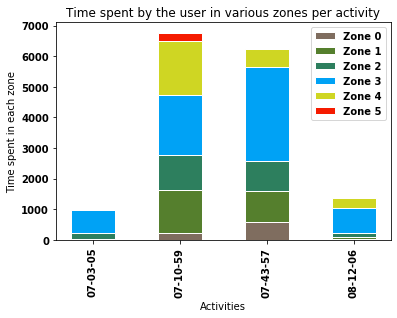

In [15]:
zonewise_duration_plot(5)

In [55]:
def helper_func_elevation(activity):
    for n in range(60,191,60):
        # computing a rolling change in elevation over past n seconds
        change_elevation=activity['elevation'].rolling(window=n).apply(lambda activity: activity[n-1] - activity[0])
        actual_elevation=activity.loc[:,'elevation']
        # if the past n seconds are not available, replace the metric with the 0 value as it is nearest to any moment change
        # in the elevation
        change_elevation[0:n]=0
        name = 'elevation_' + str(n)
        treated_elevation=change_elevation.rename(name)
        activity = pd.concat([activity, treated_elevation], axis=1)
    return(activity)



In [23]:
def helper_func_replace_missingval(activity,colName):
    indexNames = activity[ (activity[colName].isnull()) ].index.values.astype(int) 
    for i in indexNames:
        if(i != 0):
            activity.loc[i,colName]= activity.loc[i-1,colName] 
        else:
            activity.loc[i,colName]=  0
    return activity


In [24]:
def helper_func_zone_vis(heart_rate_with_zone):
    x=heart_rate_with_zone['time']
    y=heart_rate_with_zone['Zone']
    plt.title('Time spent in each zone - Chronological')
    plt.xlabel('Time')
    plt.ylabel('Zone')
    plt.plot(x,y)
    vis=plt.show()
    return vis



In [25]:
# Creating the lead variable for prediction
# Removing the trailing data points

def helper_func_response_variable(s,activity,target_zone):
    
    Zone_Future=activity['Zone'].shift(-s)
    activity.drop(activity.tail(s).index,inplace=True)
    activity.loc[activity.Zone==5,]
    
    Zone_Future.drop(Zone_Future.tail(s).index,inplace=True)
    Zone_Future=Zone_Future.to_frame()
    Zone_Future.rename(columns={'Zone':'Zone_Future'}, inplace=True)
    Zone_Future['Zone_Future'][Zone_Future['Zone_Future'] ==target_zone] = 100
    Zone_Future['Zone_Future'][Zone_Future['Zone_Future'] <6] = 0
    Zone_Future['Zone_Future'][Zone_Future['Zone_Future'] ==100] = 1
    
    return(activity,Zone_Future)
    

In [66]:
def helper_func_dataset_prep(age,s,target_zone,activity):
    activity=helper_func_replace_missingval(activity,'heartRate')
    activity=helper_func_replace_missingval(activity,'elevation')
    activity=helper_func_replace_missingval(activity,'distance')
    activity=helper_func_replace_missingval(activity,'speed')
    activity=helper_func_replace_missingval(activity,'calories')
    activity=helper_func_replace_missingval(activity,'lat')
    activity=helper_func_replace_missingval(activity,'long')
    activity=helper_func_replace_missingval(activity,'cycles')
    activity=helper_func_heartrate(activity)
    activity=helper_func_speed(activity)
    activity=helper_func_zone(age,activity)
    helper_func_zone_vis(activity)
    activity=helper_func_elevation(activity)
    (activity,Zone_Future)=helper_func_response_variable(s,activity,target_zone)
    return(activity,Zone_Future)
    

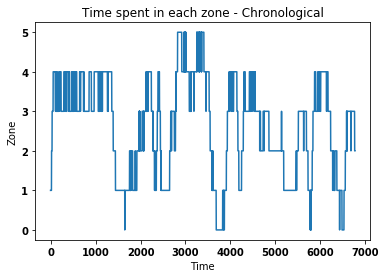

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


In [35]:
# Train Dataset prep

activity=pd.read_csv('Running_07-10-59.csv')
(activity,Zone_Future_Train)=helper_func_dataset_prep(age,s,target_zone,activity)

In [129]:
# Function to read all the datasets into a list
def helper_func_datasetlist(dataSetsPath):
    import random
    import os
    import pandas as pd
    list1=[]
    directory = os.path.join(os.getcwd(),dataSetsPath)
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                filePath=dataSetsPath+"/"+file
                df= pd.read_csv(filePath)
                filename= file
                list1.append(filename)
                random.shuffle(list1)
                list2=list1[0:20]
                list3=list1[21:25]
    return list2,list3

activitydataSetsPath=r"C:\UB\Studies\Semester 1\Programming\virtual_coach\2. Activity Datasets"
(train_list,test_list)=helper_func_datasetlist(activitydataSetsPath)




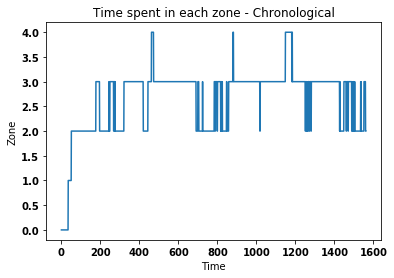

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


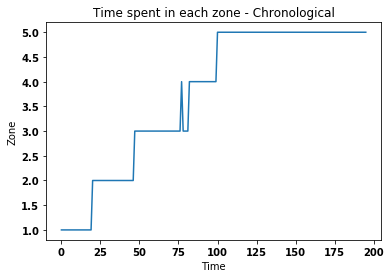

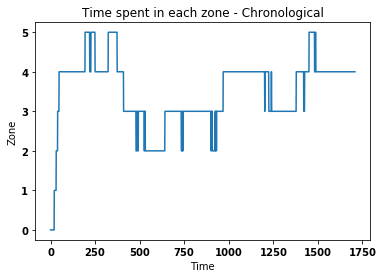

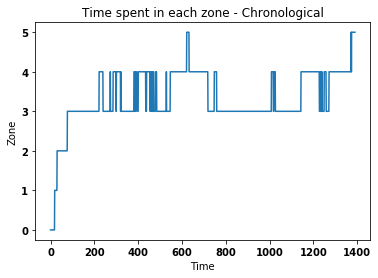

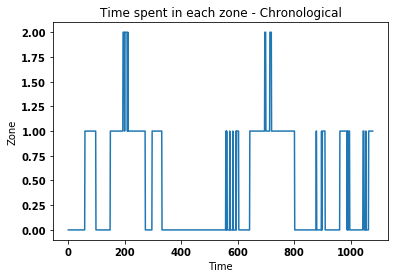

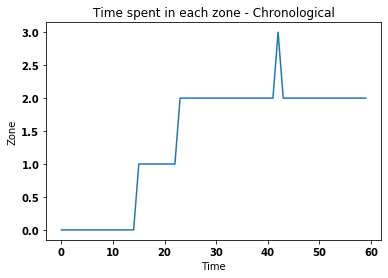

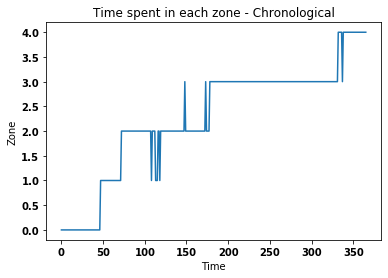

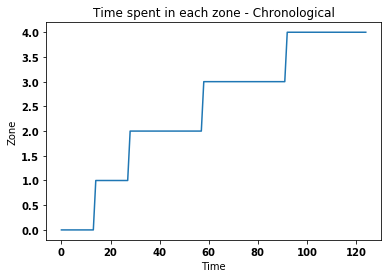

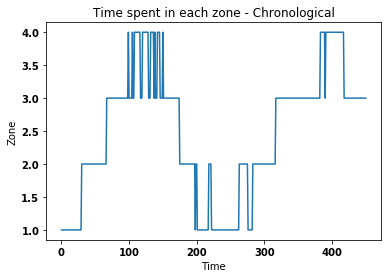

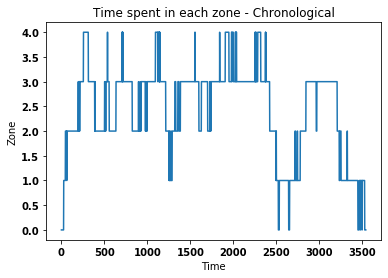

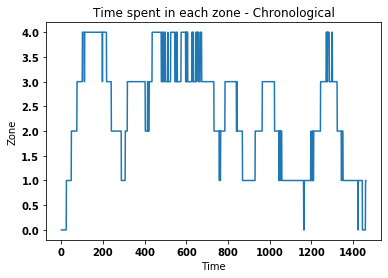

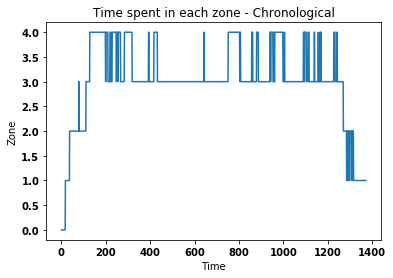

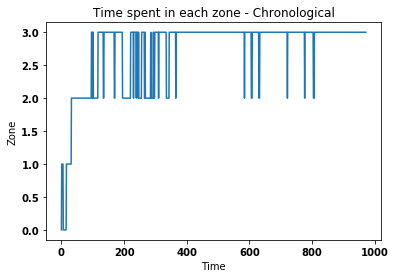

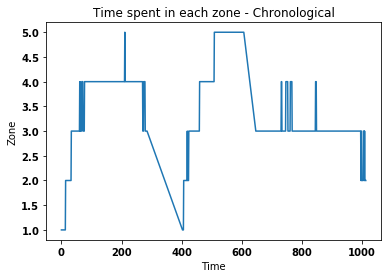

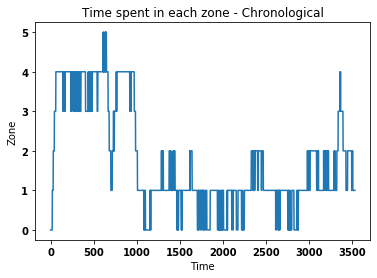

In [130]:
# Creating master train datasets

activity=pd.read_csv(train_list[0])
(train_master,Zone_Future_Train_master)=helper_func_dataset_prep(age,s,target_zone,activity)

# for i in range (1,len(train_list)):

for i in range (1,15):
    activity=pd.read_csv(train_list[i])
    (train_temp,Zone_Future_Train_temp)=helper_func_dataset_prep(age,s,target_zone,activity)
    train_master=train_master.append(pd.DataFrame(data=train_temp),ignore_index=True)
    Zone_Future_Train_master=Zone_Future_Train_master.append(pd.DataFrame(data=Zone_Future_Train_temp),ignore_index=True)
    

In [44]:
def helper_func_scale_pca_train(activity_train):
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    from sklearn import preprocessing
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import FastICA, PCA
    scaler = StandardScaler()
    scaler.fit(activity_train)
    activity_train_scaled=scaler.transform(activity_train)
    U,S,V = np.linalg.svd(activity_train_scaled)
    eigen = S**2
    eigen = eigen/sum(eigen)
    plt.title('Variance captured by principal components')
    plt.xlabel('Principal Components')
    plt.ylabel('% Variance')
    plt.plot(eigen)
    pca = PCA(n_components=9)
    pca.fit(activity_train_scaled)
    activity_train_scaled_reduced=pca.transform(activity_train_scaled)
    return(activity_train_scaled_reduced,scaler,pca)

In [106]:
# quick check if there are any null values in the dataset
train_master.isnull().values.any()
# train_master.isnull().sum()

False

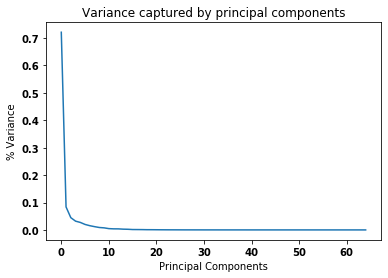

In [131]:
(activity_train_scaled_reduced,scaler,pca)=helper_func_scale_pca_train(train_master)


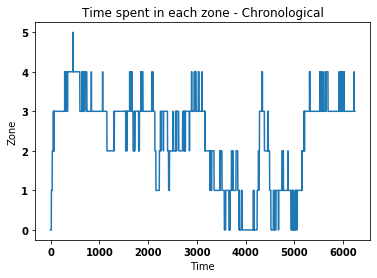

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


In [74]:
# creating the dataset for the out of sample test data
activity=pd.read_csv('Running_07-43-57.csv')
(activity,Zone_Future_Test)=helper_func_dataset_prep(age,s,target_zone,activity)


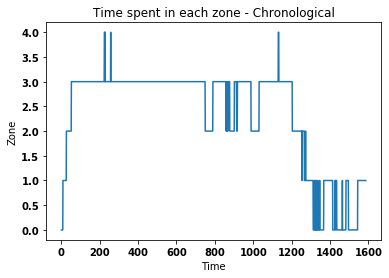

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


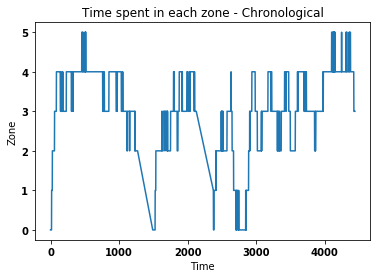

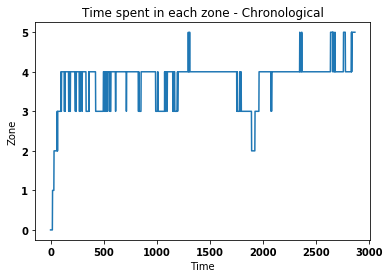

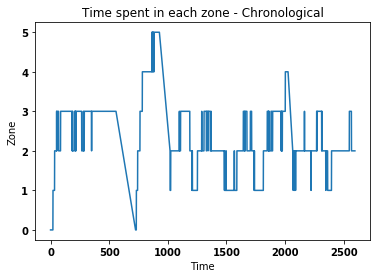

In [133]:
# creating a master test dataset

activity=pd.read_csv(test_list[0])
(test_master,Zone_Future_Test_master)=helper_func_dataset_prep(age,s,target_zone,activity)

for i in range (1,len(test_list)):

# for i in range (1,5):
    activity=pd.read_csv(test_list[i])
    (test_temp,Zone_Future_Test_temp)=helper_func_dataset_prep(age,s,target_zone,activity)
    test_master=test_master.append(pd.DataFrame(data=test_temp),ignore_index=True)
    Zone_Future_Test_master=Zone_Future_Test_master.append(pd.DataFrame(data=Zone_Future_Test_temp),ignore_index=True)
    

In [75]:
def helper_func_scale_pca_test(activity_test,scaler,pca):
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    activity_test_scaled=scaler.transform(activity_test)
    activity_test_scaled_reduced=pca.transform(activity_test_scaled)
    return(activity_test_scaled_reduced)

In [134]:
activity_test_scaled_reduced=helper_func_scale_pca_test(test_master,scaler,pca)

In [99]:
def helper_func_svm(activity_train_scaled_reduced,Zone_Future_Train,activity_test_scaled_reduced,Zone_Future_Test):
    from sklearn import svm
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    classifier = SVC(kernel = 'linear', random_state = 0)
#     classifier = svm.NuSVC(gamma='auto', random_state=0)
    classifier.fit(activity_train_scaled_reduced, Zone_Future_Train_master)
    Y_pred = classifier.predict(activity_test_scaled_reduced)
    accuracy = accuracy_score(Zone_Future_Test, Y_pred)
    cm = confusion_matrix(Zone_Future_Test, Y_pred)
    return(accuracy,cm,Y_pred)

In [ ]:
(accuracy,cm,Y_pred)=helper_func_svm(activity_train_scaled_reduced,Zone_Future_Train,activity_test_scaled_reduced,Zone_Future_Test_master)

C:\Users\vimal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
print('The accuracy measured on a test dataset is',accuracy)

The accuracy measured on a test dataset is 0.960376499165022


In [113]:
uniqueValues, occurCount = np.unique(Zone_Future_Test_master, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0. 1.]
Occurrence Count :  [6862  261]


In [114]:
Y_pred=pd.DataFrame(Y_pred)
pred_actual_test = pd.concat([Y_pred.reset_index(drop=True), Zone_Future_Test_master], axis=1)

In [301]:
pred_actual_test.to_csv(r"C:\UB\Studies\Semester 1\Programming\virtual_coach\4. Helper Functions\Prediction_Analysis.csv")

In [122]:
cm

array([[6326,    0],
       [ 261,    0]], dtype=int64)